In [1]:
#from bedrockutil import upload
from datetime import date
import awswrangler as wr
import geopandas as gpd
import pandas as pd
import os
import shapely
import uuid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
from bedrockscore.utils.load_data_s3 import AWS_LOADER

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import boto3
from boto3.session import Session
import json
import os
with open('/home/jovyan/10151_SP/secrets.json', 'r') as f:
    env = json.load(f)['aws_bedrock']

# login with AWS key
ACCESS_KEY = env['access_key']
SECRET_KEY = env['secret_key']

session = Session(aws_access_key_id=ACCESS_KEY,
                  aws_secret_access_key=SECRET_KEY,
                  region_name='ap-southeast-1')

boto3.setup_default_session(region_name="ap-southeast-1")
s3 = session.resource('s3')

In [6]:
BUCKET = 'test-bedrock-datalake'
PREFIX = 's3://test-bedrock-datalake/sample_dataset/oxford_102flower'

In [7]:
import awswrangler as wr
img_list = wr.s3.list_objects('s3://test-bedrock-datalake/sample_dataset/oxford_102flower', boto3_session = session)

# Start

In [8]:
img_df = pd.DataFrame(img_list,columns =['path'])

In [9]:
img_df['img_path'] = img_df['path'].str.split("test-bedrock-datalake/", n = 1, expand = True)[1]

In [10]:
img_df

,path,img_path
0,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_00001.jpg
1,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_00002.jpg
2,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_00003.jpg
3,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_00004.jpg
4,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_00005.jpg
...,...,...
8183,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_08185.jpg
8184,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_08186.jpg
8185,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_08187.jpg
8186,s3://test-bedrock-datalake/sample_dataset/oxfo...,sample_dataset/oxford_102flower/image_08188.jpg


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import boto3
import io
import tempfile
import glob

BUCKET_NAME = 'test-bedrock-datalake'

%matplotlib inline

def read_img_from_s3(bucket_name,img_path):
    bucket = s3.Bucket(bucket_name)
    object = bucket.Object(img_path)
    tmp = tempfile.NamedTemporaryFile()
    
    with open(tmp.name, 'wb') as f:
        object.download_fileobj(f)
        img=mpimg.imread(tmp.name)
    return img

images = []
n_img = 36
BUCKET_NAME = 'test-bedrock-datalake'
for obj in img_df.head(n_img).img_path:
    print(obj)
    try:
        #img = Image.open(get_img_from_S3(BUCKET_NAME,obj))
        images.append(read_img_from_s3(BUCKET_NAME,obj))
    except:
        print("An exception occurred")


sample_dataset/oxford_102flower/image_00001.jpg
sample_dataset/oxford_102flower/image_00002.jpg
sample_dataset/oxford_102flower/image_00003.jpg
sample_dataset/oxford_102flower/image_00004.jpg
sample_dataset/oxford_102flower/image_00005.jpg
sample_dataset/oxford_102flower/image_00006.jpg
sample_dataset/oxford_102flower/image_00007.jpg
sample_dataset/oxford_102flower/image_00008.jpg
sample_dataset/oxford_102flower/image_00009.jpg
sample_dataset/oxford_102flower/image_00010.jpg
sample_dataset/oxford_102flower/image_00011.jpg
sample_dataset/oxford_102flower/image_00012.jpg
sample_dataset/oxford_102flower/image_00013.jpg
sample_dataset/oxford_102flower/image_00014.jpg
sample_dataset/oxford_102flower/image_00015.jpg
sample_dataset/oxford_102flower/image_00016.jpg
sample_dataset/oxford_102flower/image_00017.jpg
sample_dataset/oxford_102flower/image_00018.jpg
sample_dataset/oxford_102flower/image_00019.jpg
sample_dataset/oxford_102flower/image_00020.jpg
sample_dataset/oxford_102flower/image_00

In [12]:
#read_img_from_s3('test-bedrock-datalake','sample_dataset/oxford_102flower/image_00001.jpg')

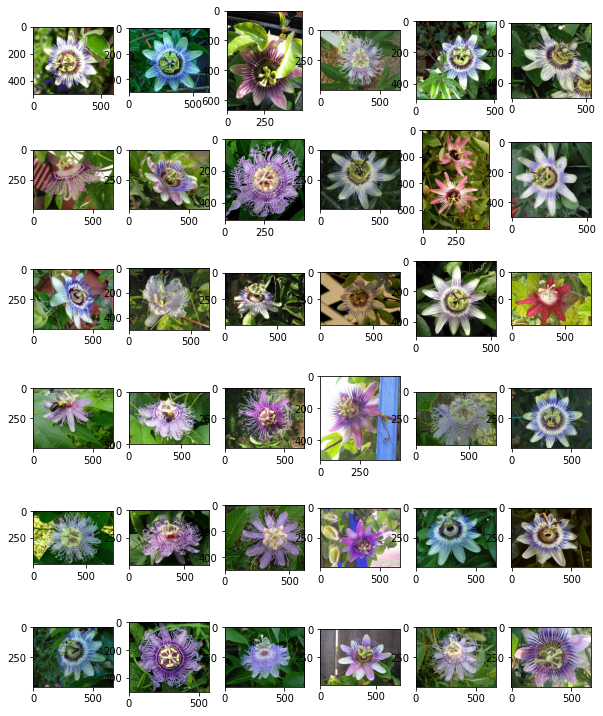

In [13]:
plt.figure(figsize=(10,15))
columns = 6
for i, image in enumerate(images[:n_img]):
    plt.subplot(int(n_img / columns + 1), columns, i + 1)
    plt.imshow(image)


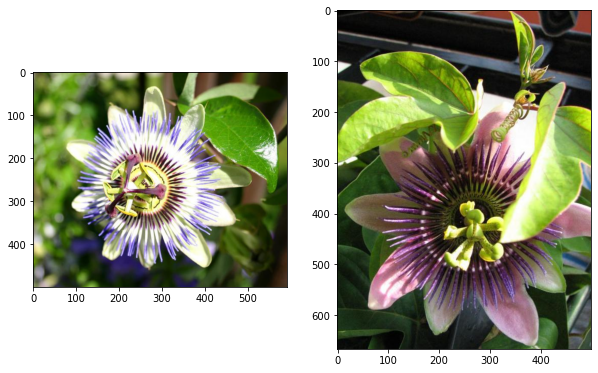

In [14]:
img1 = images[0]
img2 = images[2]

plt.figure(figsize=(10,15))
plt.subplot(1, 2,1)
plt.imshow(img1)
plt.subplot(1, 2,2)
plt.imshow(img2)

In [16]:
import cv2
 
orb=cv2.ORB_create()
img= img1
 
kp, des = orb.detectAndCompute(img, None)
imgg=cv2.drawKeypoints(img, kp, None)

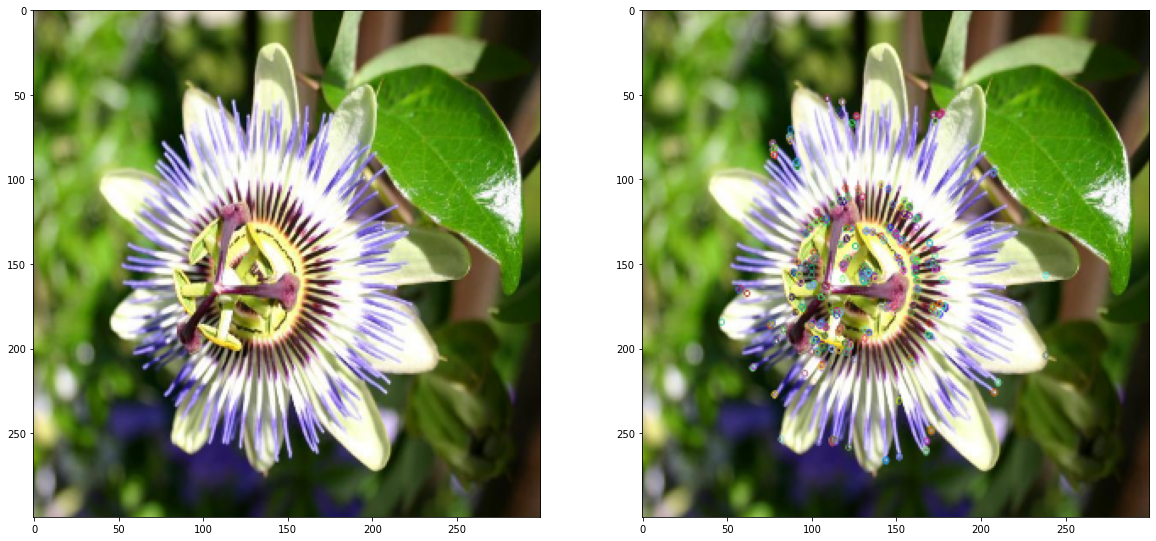

In [17]:
img = cv2.resize(img, (300, 300))  
imgg = cv2.resize(imgg, (300, 300))  
 
plt.figure(figsize=(20,35))
plt.subplot(1, 2,1)
plt.imshow(img)
plt.subplot(1, 2,2)
plt.imshow(imgg)

In [50]:
def keypointsMatcher(img1,img2,algorithm =cv2.NORM_HAMMING):
    # find the keypoints and descriptors with SIFT
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    
    # create BFMatcher object
    bf = cv2.BFMatcher(algorithm, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    return kp1,kp2,matches

In [51]:
kp1,kp2,matches = keypointsMatcher(img1,img2,algorithm = cv2.NORM_HAMMING)

In [54]:
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

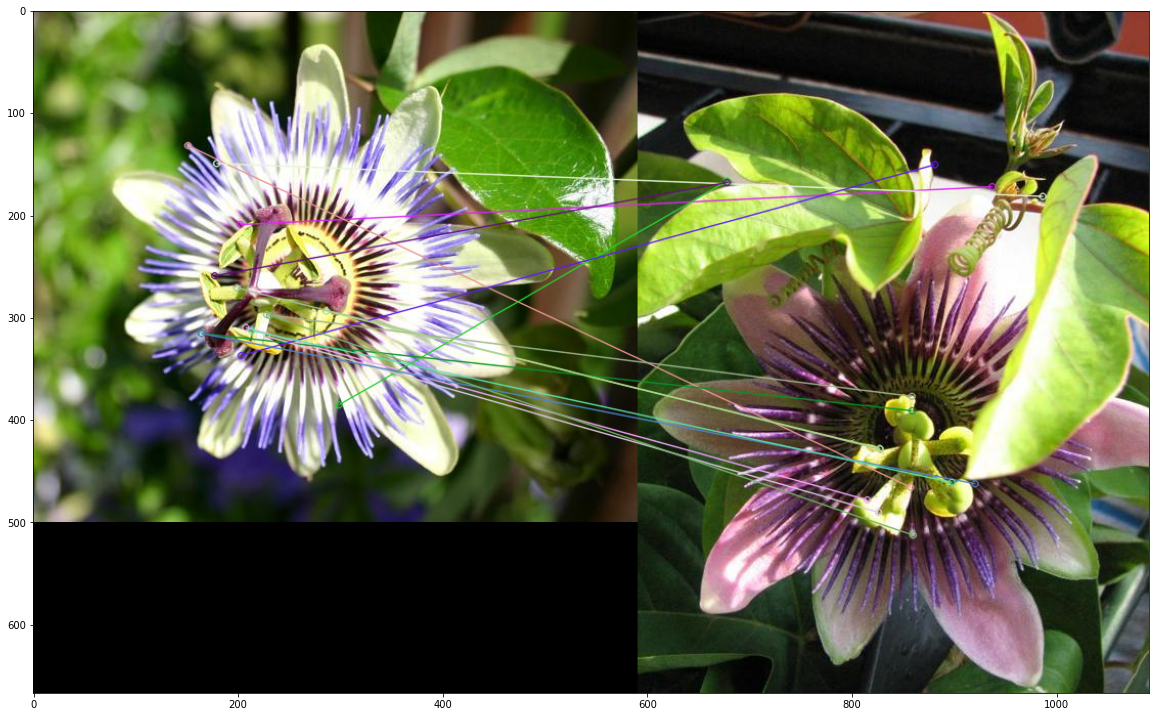

In [53]:
plt.figure(figsize=(20,45))
plt.imshow(img3)